In [17]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})
import dill
import os
import shutil

import tensorflow as tf

tf.get_logger().setLevel('ERROR')
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [4]:
#Importing helpers/labels.py from the cityscrapesScripts github page (https://github.com/mcordts/cityscapesScripts)
from labels import *
id2label[9].category 

'flat'

In [241]:
category = id2label[2].category
print("Category of label with ID '{id}': {category}".format( id=2, category=category ))

Category of label with ID '2': Label(name='rectification border', id=2, trainId=255, category='void', categoryId=0, hasInstances=False, ignoreInEval=True, color=(0, 0, 0))


In [9]:
# import pathlib

# def move_source_files(source_folder:pathlib.Path, target_folder:pathlib.Path):
#     target_folder.mkdir(parents=True, exist_ok=True)
#     for image_file in source_folder.rglob("*.png"): # recursively find image paths
#         image_file.rename(target_folder.joinpath(image_file.name.replace('_leftImg8bit', '')))


# path_out = pathlib.Path("Data/photos")

# #Important note : we ignore test set because the labelled images are invalid in the dataset provided
# paths = ['train','val']

# for p in paths:
#     path_string = "Data/photos/" + p 
#     path_in = pathlib.Path(path_string)
#     move_source_files(path_in, path_out)

In [10]:
# def move_color_masks(source_folder:pathlib.Path, target_folder:pathlib.Path):
#     target_folder.mkdir(parents=True, exist_ok=True)
#     for image_file in source_folder.rglob("*color.png"): # recursively find image paths
#         image_file.rename(target_folder.joinpath(image_file.name.replace('_gtFine_color', '')))

# path_out = pathlib.Path("Data/masks_color")

# #Important note : we ignore test set because the labelled images are invalid in the dataset provided
# paths = ['train','val']

# for p in paths:
#     path_string = "Data/labelled_photos/" + p 
#     path_in = pathlib.Path(path_string)
#     move_color_masks(path_in, path_out)

In [40]:
# def move_labelled_masks(source_folder:pathlib.Path, target_folder:pathlib.Path):
#     target_folder.mkdir(parents=True, exist_ok=True)
#     for image_file in source_folder.rglob("*labelIds.png"): # recursively find image paths
#         image_file.rename(target_folder.joinpath(image_file.name.replace('_gtFine_labelIds', '')))

# path_out = pathlib.Path("Data/masks_labelled")

# #Important note : we ignore test set because the labelled images are invalid in the dataset provided
# paths = ['train','val']

# for p in paths:
#     path_string = "Data/Archive/labelled_photos/" + p 
#     path_in = pathlib.Path(path_string)
#     move_labelled_masks(path_in, path_out)

In [41]:
#Recreating test/train/val sets
import splitfolders
splitfolders.ratio('Data/masks_labelled', output="Data/masks", seed=543, ratio=(.8, 0.1,0.1), move=True)

Copying files: 3475 files [01:19, 43.63 files/s]


In [14]:
splitfolders.ratio('Data/photos', output="Data/photos_raw", seed=543, ratio=(.8, 0.1,0.1), move=True)

Copying files: 3475 files [01:15, 46.33 files/s]


In [42]:
train_image_dir = 'Data/photos_raw/train'
train_mask_dir = 'Data/masks/train'
train_image_list = os.listdir(train_image_dir)
train_mask_list = os.listdir(train_mask_dir)
train_image_list.sort()
train_mask_list.sort()
print(f'. . . . .Number of images: {len(train_image_list)}\n. . . . .Number of masks: {len(train_mask_list)}')

. . . . .Number of images: 2780
. . . . .Number of masks: 2780


In [43]:
#Verifying naming consistency
for i in range(len(train_image_list)):
    assert train_image_list[i] == train_mask_list[i]

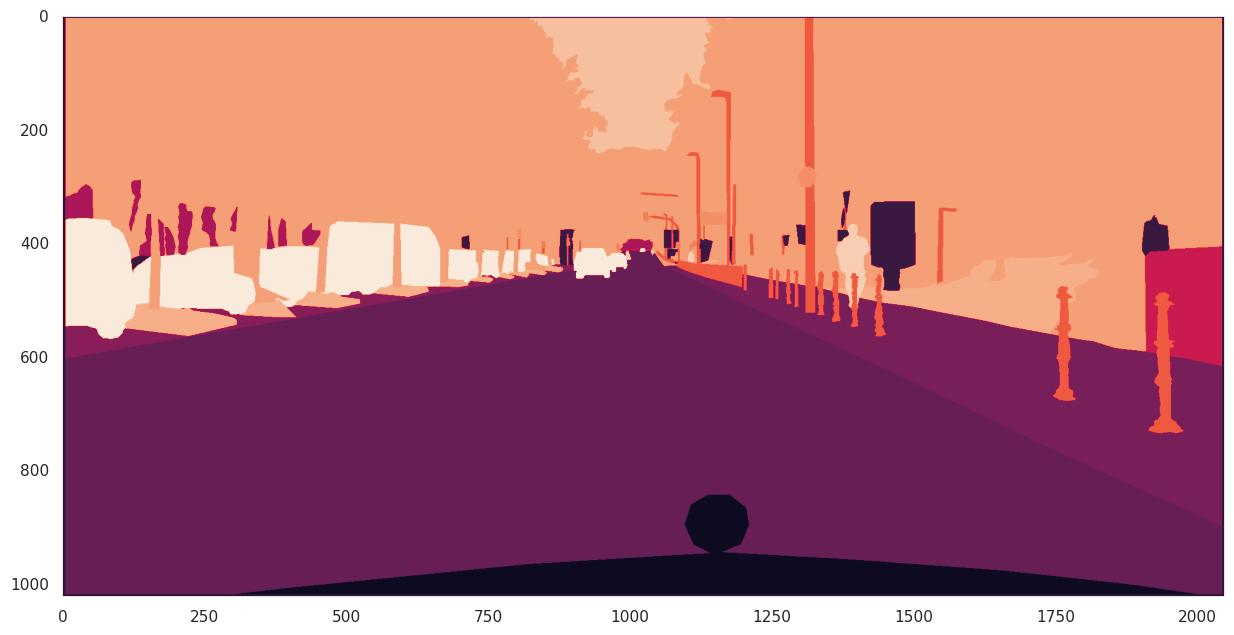

In [234]:
from skimage import io

#Sampling a random image
image = io.imread('Data/masks/train/'+train_mask_list[5])

#Plotting the image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)
plt.grid(None)
plt.show()

In [235]:
image.shape

(1024, 2048)

In [236]:
print(np.unique(image[:,54]))

[ 3  7  9 11 21 26]


In [45]:
np.unique(image)

array([ 0,  1,  3,  4,  7,  8,  9, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24,
       26], dtype=uint8)

In [55]:
#Testing function
mask = np.zeros((image.shape[0], image.shape[1], 8))

cats = {'void': [0, 1, 2, 3, 4, 5, 6],
 'flat': [7, 8, 9, 10],
 'construction': [11, 12, 13, 14, 15, 16],
 'object': [17, 18, 19, 20],
 'nature': [21, 22],
 'sky': [23],
 'human': [24, 25],
 'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]}

image = np.squeeze(image)

for i in range(-1,34):
    if i in cats['void']:
        mask[:,:,0] = np.logical_or(mask[:,:,0],(image==i))
    elif i in cats['flat']:
        mask[:,:,1] = np.logical_or(mask[:,:,1],(image==i))
    elif i in cats['construction']:
        mask[:,:,2] = np.logical_or(mask[:,:,2],(image==i))
    elif i in cats['object']:
        mask[:,:,3] = np.logical_or(mask[:,:,3],(image==i))
    elif i in cats['nature']:
        mask[:,:,4] = np.logical_or(mask[:,:,4],(image==i))
    elif i in cats['sky']:
        mask[:,:,5] = np.logical_or(mask[:,:,5],(image==i))
    elif i in cats['human']:
        mask[:,:,6] = np.logical_or(mask[:,:,6],(image==i))
    elif i in cats['vehicle']:
        mask[:,:,7] = np.logical_or(mask[:,:,7],(image==i))

In [66]:
mask[55,55,:]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [67]:
image[55,55]
#The function works!

21

In [281]:
from tensorflow.keras.preprocessing import image

def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def total_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + (3*dice_loss(y_true, y_pred))
    return loss


from tensorflow.keras.utils import Sequence
class seg_gen(Sequence):
    def __init__(self, path_image, path_mask, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.path_image, self.path_mask = path_image, path_mask
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        idx = np.random.randint(0, len(self.x), batch_size)
        batch_x, batch_y = [], []
        drawn = 0
        for i in idx:
            _image = image.img_to_array(image.load_img(f'{self.path_image}/{self.x[i]}', target_size=(img_height, img_width)))/255.   
            img = image.img_to_array(image.load_img(f'{self.path_mask}/{self.y[i]}', grayscale=True, target_size=(img_height, img_width)))
            labels = np.unique(img)
            if len(labels) < 3:
                idx = np.random.randint(0, len(train_image_list), batch_size-drawn)
                continue
            img = np.squeeze(img)
            mask = np.zeros((img.shape[0], img.shape[1], 8))
            for i in range(-1, 34):
                if i in cats['void']:
                    mask[:,:,0] = np.logical_or(mask[:,:,0],(img==i))
                elif i in cats['flat']:
                    mask[:,:,1] = np.logical_or(mask[:,:,1],(img==i))
                elif i in cats['construction']:
                    mask[:,:,2] = np.logical_or(mask[:,:,2],(img==i))
                elif i in cats['object']:
                    mask[:,:,3] = np.logical_or(mask[:,:,3],(img==i))
                elif i in cats['nature']:
                    mask[:,:,4] = np.logical_or(mask[:,:,4],(img==i))
                elif i in cats['sky']:
                    mask[:,:,5] = np.logical_or(mask[:,:,5],(img==i))
                elif i in cats['human']:
                    mask[:,:,6] = np.logical_or(mask[:,:,6],(img==i))
                elif i in cats['vehicle']:
                    mask[:,:,7] = np.logical_or(mask[:,:,7],(img==i))
            mask = np.resize(mask,(img_height*img_width, 8))
            batch_y.append(mask)
            batch_x.append(_image)
            drawn += 1
        return np.array(batch_x), np.array(batch_y)

In [98]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


# In[2]:


def DilatedNet(img_height, img_width, nclasses, use_ctx_module=False, bn=False):
    print('. . . . .Building DilatedNet. . . . .')
    def bilinear_upsample(image_tensor):
        upsampled = tf.image.resize(image_tensor, size=(img_height, img_width))
        return upsampled
    
    def conv_block(conv_layers, tensor, nfilters, size=3, name='', padding='same', dilation_rate=1,pool=False):
        if dilation_rate == 1:
            conv_type = 'conv'
        else:
            conv_type = 'dilated_conv'
        for i in range(conv_layers):
            tensor = Conv2D(nfilters, size, padding=padding, use_bias=False, dilation_rate=dilation_rate, name=f'block{name}_{conv_type}{i+1}')(tensor)
            if bn:
                tensor = BatchNormalization(name=f'block{name}_bn{i+1}')(tensor)
            tensor = Activation('relu', name=f'block{name}_relu{i+1}')(tensor)
        if pool:
            tensor = MaxPooling2D(2, name=f'block{name}_pool')(tensor)
        return tensor
       
    nfilters = 64
    img_input = Input(shape=(img_height, img_width, 3))
    x = conv_block(conv_layers=2,tensor=img_input, nfilters=nfilters*1, size=3, pool=True, name=1)
    x = conv_block(conv_layers=2,tensor=x, nfilters=nfilters*2, size=3, pool=True, name=2)
    x = conv_block(conv_layers=3,tensor=x, nfilters=nfilters*4, size=3, pool=True, name=3)
    x = conv_block(conv_layers=3,tensor=x, nfilters=nfilters*8, size=3, name=4)
    x = conv_block(conv_layers=3,tensor=x, nfilters=nfilters*8, size=3,dilation_rate=2, name=5)
    x = conv_block(conv_layers=1,tensor=x, nfilters=nfilters*64, size=7,dilation_rate=4, name='_FCN1')
    x = Dropout(0.5)(x)
    x = conv_block(conv_layers=1,tensor=x, nfilters=nfilters*64, size=1, name='_FCN2')
    x = Dropout(0.5)(x)  
    x = Conv2D(filters=nclasses, kernel_size=1, padding='same', name=f'frontend_output')(x)
    if use_ctx_module:
        x = conv_block(conv_layers=2, tensor=x, nfilters=nclasses*2, size=3, name='_ctx1')
        x = conv_block(conv_layers=1, tensor=x, nfilters=nclasses*4, size=3, name='_ctx2', dilation_rate=2)
        x = conv_block(conv_layers=1, tensor=x, nfilters=nclasses*8, size=3, name='_ctx3', dilation_rate=4)
        x = conv_block(conv_layers=1, tensor=x, nfilters=nclasses*16, size=3, name='_ctx4', dilation_rate=8)
        x = conv_block(conv_layers=1, tensor=x, nfilters=nclasses*32, size=3, name='_ctx5', dilation_rate=16)        
        x = conv_block(conv_layers=1, tensor=x, nfilters=nclasses*32, size=3, name='_ctx7')
        x = Conv2D(filters=nclasses, kernel_size=1, padding='same', name=f'ctx_output')(x)
    x = Lambda(bilinear_upsample, name='bilinear_upsample')(x)
    x = Reshape((img_height*img_width, nclasses))(x)
    x = Activation('softmax', name='final_softmax')(x)
  
    model = Model(inputs=img_input, outputs=x, name='DilatedNet')
    print('. . . . .Building network successful. . . . .')
    return model

In [282]:
batch_size = 16
samples = len(train_image_list)
steps = samples//batch_size
img_height, img_width = 256, 256
classes = 8
filters_n = 64

unet = DilatedNet(256, 256, 8,use_ctx_module=True, bn=True)
unet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[dice_coeff, 'accuracy'])
tb = TensorBoard(log_dir='logs', write_graph=True)
mc = ModelCheckpoint(mode='max', filepath='models-dr/pdilated.h5', monitor='acc', save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='acc', patience=6, verbose=1)
vis = visualize()
callbacks = [tb, mc, es]
train_gen = seg_gen(train_image_dir, train_mask_dir, train_image_list, train_mask_list, batch_size)

. . . . .Building DilatedNet. . . . .
. . . . .Building network successful. . . . .


In [180]:
unet.summary()

Model: "DilatedNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1728      
                                                                 
 block1_bn1 (BatchNormalizat  (None, 256, 256, 64)     256       
 ion)                                                            
                                                                 
 block1_relu1 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36864     
                                                                 
 block1_bn2 (BatchNormalizat  (None, 256, 256, 64)     256       
 ion)                                                   

 dropout_17 (Dropout)        (None, 32, 32, 4096)      0         
                                                                 
 frontend_output (Conv2D)    (None, 32, 32, 8)         32776     
                                                                 
 block_ctx1_conv1 (Conv2D)   (None, 32, 32, 16)        1152      
                                                                 
 block_ctx1_bn1 (BatchNormal  (None, 32, 32, 16)       64        
 ization)                                                        
                                                                 
 block_ctx1_relu1 (Activatio  (None, 32, 32, 16)       0         
 n)                                                              
                                                                 
 block_ctx1_conv2 (Conv2D)   (None, 32, 32, 16)        2304      
                                                                 
 block_ctx1_bn2 (BatchNormal  (None, 32, 32, 16)       64        
 ization) 

In [143]:
from tensorflow.keras import backend as K

unet.fit(train_gen, steps_per_epoch=steps,epochs=2, workers=8)
print('Saving final weights')
unet.save_weights('dilated.h5')

Epoch 1/2
 47/173 [=======>......................] - ETA: 2:09:18 - loss: 1.0170 - dice_coeff: 0.5300 - accuracy: 0.6236

KeyboardInterrupt: 

In [264]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = tf.keras.applications.MobileNetV2(input_shape=[img_height, img_width, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

In [265]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output

In [266]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [267]:
n_classes = 8
def bilinear_upsample(image_tensor):
    upsampled = tf.image.resize(image_tensor, size=(img_height, img_width))
    return upsampled

def unet_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      filters=n_classes, kernel_size=1,
      padding='same')  #128x128 -> 256x256

    x = last(x)
    
    x = Lambda(bilinear_upsample, name='bilinear_upsample')(x)
    x = Reshape((img_height*img_width, nclasses))(x)
    x = Activation('softmax', name='final_softmax')(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [287]:
OUTPUT_CLASSES = 8

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[dice_coeff, 'accuracy'])

model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_13 (Functional)          [(None, 128, 128, 9  1841984     ['input_35[0][0]']               
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                        

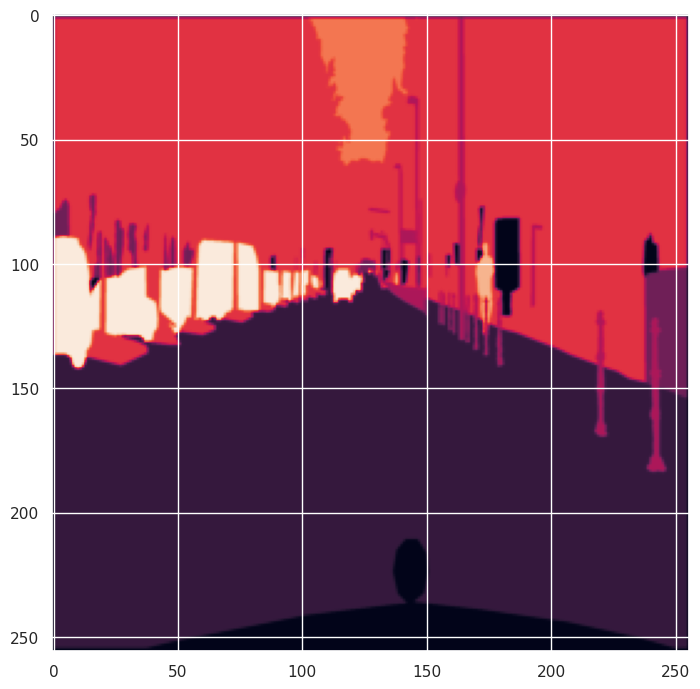

In [250]:
sample_mask = io.imread('Data/masks/train/'+train_mask_list[5])

def convert_to_categ(val):
    return id2label[val].categoryId

vector = np.vectorize(convert_to_categ)
sample_mask_2 = vector(sample_mask)
sample_mask_2 = resize(sample_mask_2, (256,256))
plt.imshow(sample_mask_2)

In [261]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

def create_mask(pred_mask):
        color_map = {
             '0': [0, 0, 0],
             '1': [153, 153, 0],
             '2': [255, 204, 204],
             '3': [255, 0, 127],
             '4': [0, 255, 0],
             '5': [0, 204, 204],
             '6': [255, 0, 0],
             '7': [0, 0, 255]
        }

        dims = (256, 256)
        z = pred_mask
        z = np.squeeze(z)
        z = z.reshape(256, 256, 8)
        z = cv2.resize(z, (dims[1], dims[0]))

        y = np.argmax(z, axis=2)

        img_color = sample_image.copy()   
        for i in range(dims[0]):
            for j in range(dims[1]):
                img_color[i, j] = color_map[str(y[i, j])]
        
        return y
    
def convert_to_categ(val):
    return id2label[val].categoryId
    
def convert_categories(mask):
    vector = np.vectorize(convert_to_categ)
    mod_mask = vector(mask)
    return resize(mod_mask, (256,256))

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], convert_categories(mask[0]), create_mask(pred_mask)])
    else:
        display([sample_image, convert_categories(sample_mask),
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [262]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [285]:
batch_size = 16
samples = len(train_image_list)
steps = samples//batch_size
val_samples = len(val_image_list)
val_steps = val_samples//batch_size

img_height, img_width = 256, 256
classes = 8
filters_n = 64

val_image_dir = 'Data/photos_raw/val'
val_mask_dir = 'Data/masks/val'
val_image_list = os.listdir(val_image_dir)
val_mask_list = os.listdir(val_mask_dir)
val_image_list.sort()
val_mask_list.sort()
val_gen = seg_gen(val_image_dir, val_mask_dir, val_image_list, val_mask_list, batch_size)

sample_mask = io.imread('Data/masks/val/'+val_mask_list[5])
sample_image = resize(io.imread('Data/photos_raw/val/'+val_mask_list[5]), (256,256))

1/1 [==============================] - 0s 61ms/step


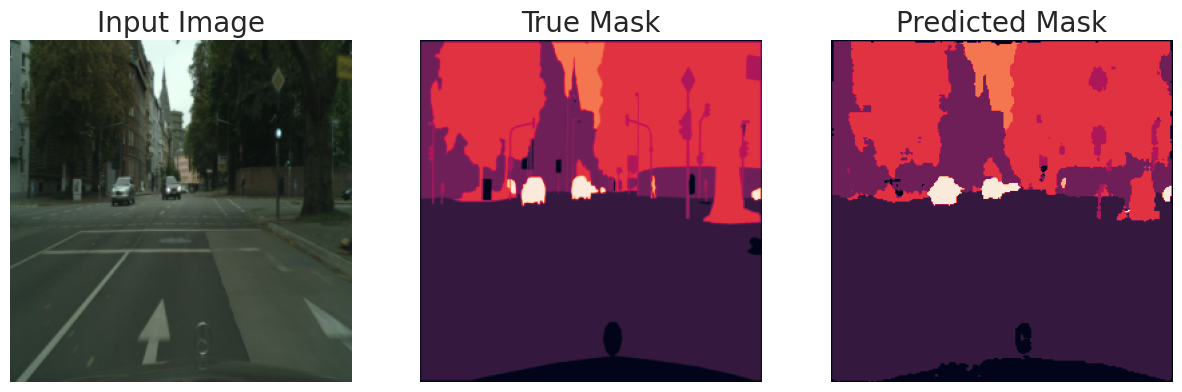


Sample Prediction after epoch 10

173/173 [==============================] - 366s 2s/step - loss: 0.2896 - dice_coeff: 0.8559 - accuracy: 0.9035 - val_loss: 0.3608 - val_dice_coeff: 0.8350 - val_accuracy: 0.8834


In [288]:
EPOCHS = 10

model_history = model.fit(train_gen,
                          epochs=EPOCHS,
                          steps_per_epoch=steps,
                          validation_data=val_gen,
                          validation_steps=val_steps,
                          callbacks=[DisplayCallback()])

In [289]:
model.save('Models/mobilenet_unet_noaug')

(0.0, 0.6284592345356941)

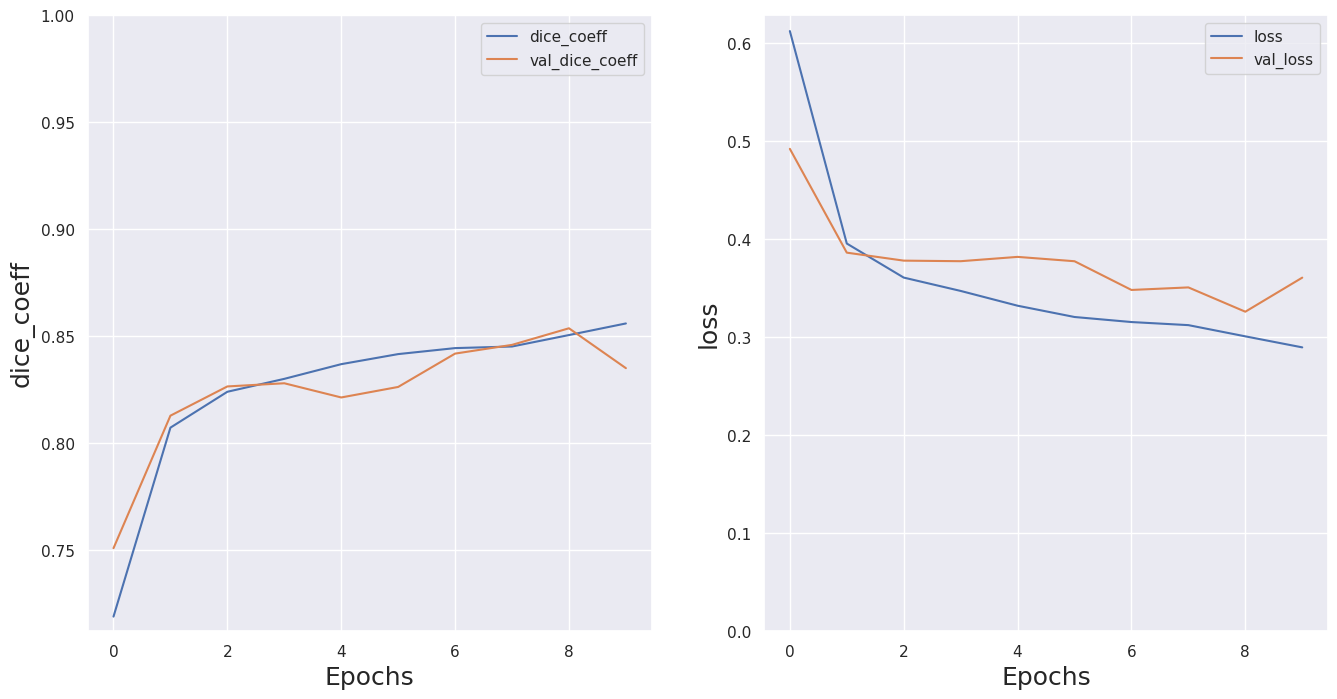

In [291]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(model_history, 'dice_coeff')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(model_history, 'loss')
plt.ylim(0, None)

In [179]:
import albumentations as A

def create_augmentation_pipeline():
    augmentation_pipeline = A.Compose(
    [
        A.OneOf(
            [
                # Apply one of transforms to 50% of images
                A.RandomContrast(), # Apply random contrast
                A.RandomGamma(), # Apply random gamma
                A.RandomBrightness(), # Apply random brightness
            ],
            p = 0.5 
        ),
        A.OneOf(
            [
                # Apply one of transforms to 50% images
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion()
            ],
            p = 0.5 
        )
    ],
    p = 0.9 # In 10% of cases keep same image because that's interesting also
    )   
    return augmentation_pipeline

In [ ]:
def create_datagenerator(PATH):
    options = {'horizontal_flip': True, 'vertical_flip': False}
    image_datagen = ImageDataGenerator(rescale=1./255, **options)
    mask_datagen = ImageDataGenerator(**options)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen_mask = ImageDataGenerator(rescale=1)
    
    # Create custom zip and custom batch_size
    def combine_generator(gen1, gen2, batch_size=BATCH_SIZE,training=True):
        while True:
            image_batch, label_batch = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
            image_batch, label_batch = np.expand_dims(image_batch,axis=0), np.expand_dims(label_batch,axis=0)

            for i in range(batch_size - 1):
                image_i,label_i = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
              
                if training == True:
                    aug_pipeline = create_augmentation_pipeline()
                    augmented = aug_pipeline(image=image_i, mask=label_i)
                    image_i, label_i = augmented['image'], augmented['mask']

                image_i, label_i = np.expand_dims(image_i,axis=0),np.expand_dims(label_i,axis=0)
                image_batch = np.concatenate([image_batch,image_i],axis=0)
                label_batch = np.concatenate([label_batch,label_i],axis=0)
              
            yield((image_batch,label_batch))